## Pixel Count

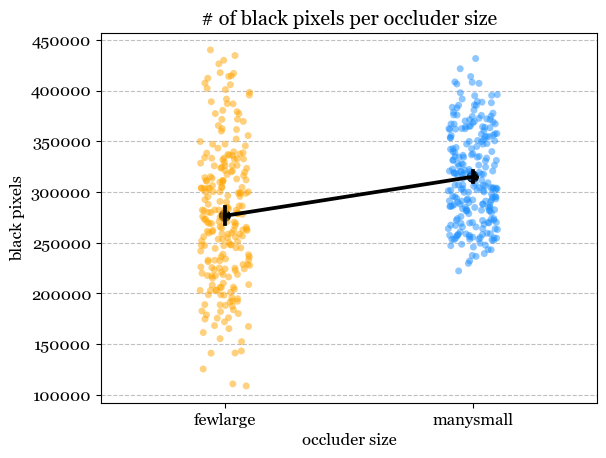

In [1]:
'''
COUNTING THE NUMBER OF BLACK PIXELS IN IMAGES
---------------------------------------------

In this script, we extract the number of black pixels present
in the stimulus images that we used in a classification task.

Our goal is to quantify the amount of black present in an image,
outside of an object that is occluded on that image.

Inputs are:
 - the occluded images
 - the original objects that were occluded

Outputs are:
 - per image, the number of black pixels
'''

import pandas as pd
import seaborn as sns
import numpy as np
import cv2 as cv, cv2
import matplotlib.pyplot as plt
import glob
import warnings
import pingouin as pg
import os
warnings.filterwarnings("ignore")
df = pd.read_csv("DF_cleaned.csv")
plt.style.use("../Analysis/styles/mystyle.mplstyle")

# list the input images
occluded_images = glob.glob(r'../Experiment/Stimulus/all_stim/occlusion/partialviewing/*/*/*.png')
object_images = glob.glob(r'../Experiment/Stimulus/objects/*.png')

# extract the directory of the object images
object_dir = r'../Experiment/Stimulus/objects/'

# match each occluded image with its object
matched_images = pd.DataFrame({
    'occluded_images' : [i for i in occluded_images],
    'object_images' : [object_dir + i.split('/')[-1].split('_')[-1]
                       for i in occluded_images],
    'black pixels' : [(0) for x in range(len(occluded_images))], # empty column here
    'occluder size' : [i.split('partialviewing\\')[1].split('\\')[0]
                       for i in occluded_images],
})

### Calculate black pixels

# loop over all images and calculate
for i in range(len(occluded_images)): 
    # extract the name of the images
    occluded_file = matched_images['occluded_images'][i]
    object_file = matched_images['object_images'][i]

    # read the images
    occluded_im = cv.imread(occluded_file, -1)
    object_im = cv.imread(object_file, -1)

    # extract the object mask
    object_mask = object_im[:,:,3] == 255

    # remove the object from the count
    im_without_object = occluded_im[~object_mask]

    # count the black pixels
    nb_black_pixels = len(im_without_object[im_without_object == 0])

    # append the results
    matched_images['black pixels'][i] = nb_black_pixels



### Visualise the data

fig, axes = plt.subplots()

stripplot = sns.stripplot(
    data = matched_images,
    y = 'black pixels',
    x = 'occluder size',  
    palette = {'manysmall': 'dodgerBlue', 'fewlarge' : 'orange'},
    ax = axes,
    zorder = 2,
    alpha = 0.5
)
pointplot = sns.pointplot(
    data = matched_images,
    y = 'black pixels',
    x = 'occluder size',  
    ax = axes,
    join = True,
    #palette = {'manysmall': 'dodgerBlue', 'fewlarge' : 'orange'},
    color = 'black',
    #zorder = 4,
)
plt.title('# of black pixels per occluder size')

plt.show()
#plt.close()

In [2]:
for i in range(len(matched_images)):
    path1 = matched_images['occluded_images'].iloc[i]
    path1 = path1.replace('/', '\\')
    path1 = path1.split('\\Experiment\\')[1]
    matched_images['occluded_images'].iloc[i] = path1
b_pixel_column = [0] * len(df)

for i in range(len(matched_images)):
    occluded_image = matched_images['occluded_images'].iloc[i]
    if occluded_image in df['filename'].values:
        # Get all indices where the condition is true
        indices_to_update = df[df['filename'] == occluded_image].index
        if not indices_to_update.empty:
            # Update all instances in b_pixel_column
            for index in indices_to_update:
                b_pixel_column[index] = matched_images['black pixels'].iloc[i]

df["black pixels"] = b_pixel_column

In [3]:
pixel_df_acc = df.groupby(['filename', 'size_occl', 'black pixels', 'soa', 'difficulty'], as_index=False)["acc"].mean()
pixel_df_rt = df.groupby(['filename', 'size_occl', 'black pixels', 'soa', 'difficulty'], as_index=False)["rt"].mean()

In [4]:
pixel_df_acc_25 = pixel_df_acc[pixel_df_acc['soa'] == 0.025]
pixel_df_acc_50 = pixel_df_acc[pixel_df_acc['soa'] == 0.050]
pixel_df_acc_100 = pixel_df_acc[pixel_df_acc['soa'] == 0.100]

In [5]:
pixel_df_rt_25 = pixel_df_rt[pixel_df_rt['soa'] == 0.025]
pixel_df_rt_50 = pixel_df_rt[pixel_df_rt['soa'] == 0.050]
pixel_df_rt_100 = pixel_df_rt[pixel_df_rt['soa'] == 0.100]

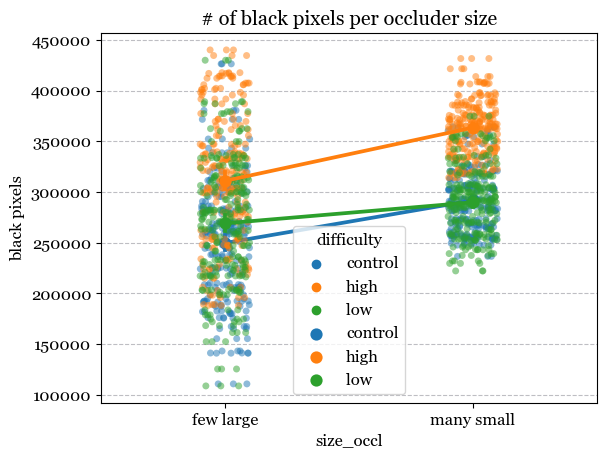

In [6]:
fig, axes = plt.subplots()

stripplot = sns.stripplot(
    data = pixel_df_acc,
    y = 'black pixels',
    x = 'size_occl',  
    #palette = {'many small': 'dodgerBlue', 'few large' : 'orange'},
    ax = axes,
    hue = 'difficulty',
    zorder = 2,
    alpha = 0.5
)
pointplot = sns.pointplot(
    data = pixel_df_acc,
    y = 'black pixels',
    x = 'size_occl',  
    ax = axes,
    join = True,
    hue =  'difficulty',
    #palette = {'manysmall': 'dodgerBlue', 'fewlarge' : 'orange', 'control' : 'purple'},
    #color = 'black',
    #zorder = 4,
)
plt.title('# of black pixels per occluder size')

plt.show()
#plt.close()

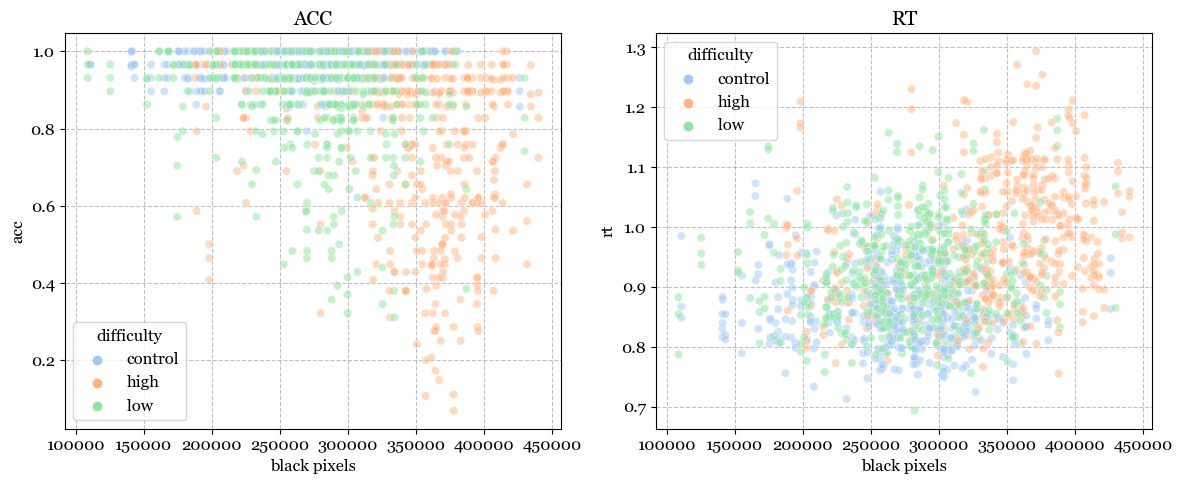

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have two separate figures for each scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot
sns.scatterplot(
    data=pixel_df_acc,
    y='acc',
    x='black pixels',
    hue="difficulty",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax1
)
ax1.set_title('ACC')

# Second scatter plot
sns.scatterplot(
    data=pixel_df_rt,
    y='rt',
    x='black pixels',
    hue="difficulty",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax2
)
ax2.set_title('RT')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


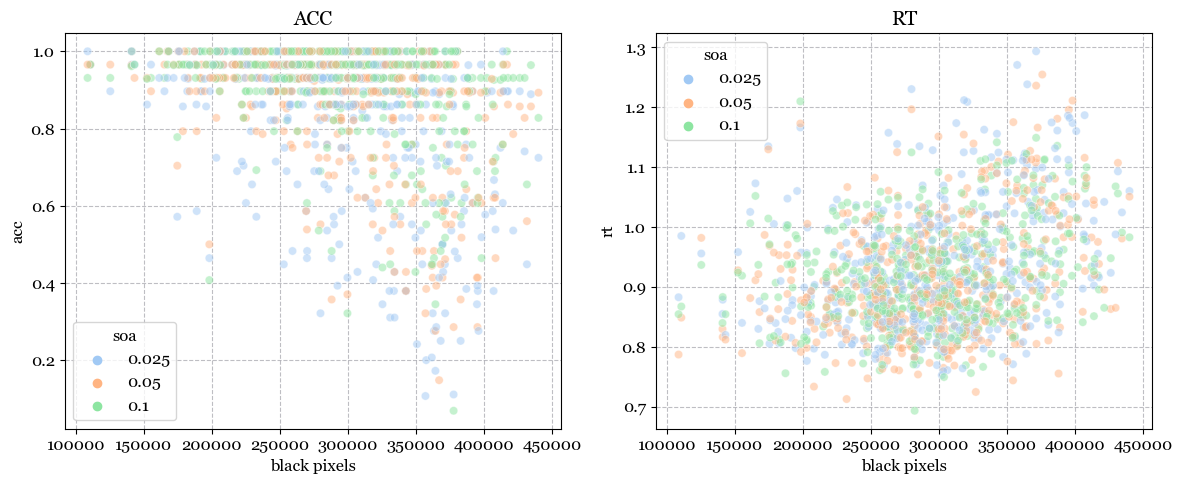

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have two separate figures for each scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot
sns.scatterplot(
    data=pixel_df_acc,
    y='acc',
    x='black pixels',
    hue="soa",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax1
)
ax1.set_title('ACC')

# Second scatter plot
sns.scatterplot(
    data=pixel_df_rt,
    y='rt',
    x='black pixels',
    hue="soa",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax2
)
ax2.set_title('RT')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


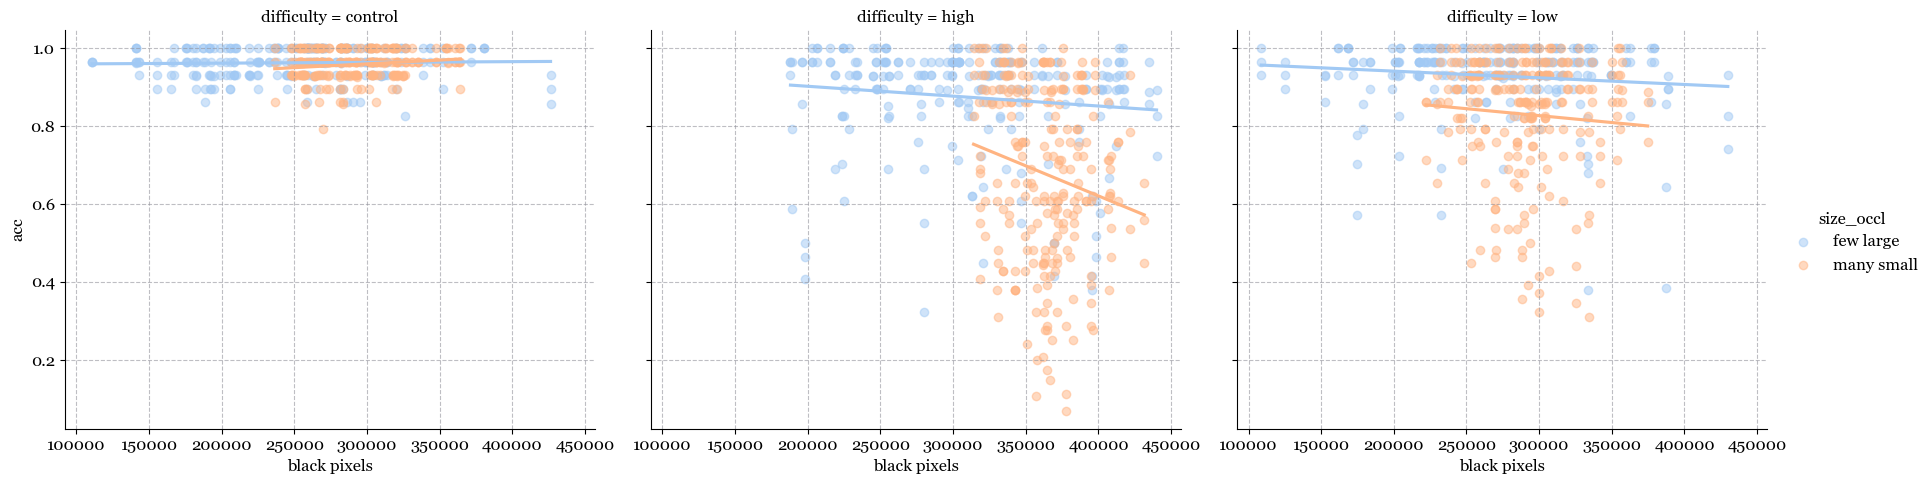

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pixel_df_acc is your DataFrame
sns.lmplot(
    data=pixel_df_acc,
    x='black pixels',
    y='acc',
    hue='size_occl',
    col='difficulty',
    palette='pastel',
    scatter_kws={"alpha": 0.5},
    ci=None,  # Set to None to disable confidence intervals
    height=5,  # Adjust the height of each subplot
    aspect=1.2,  # Adjust the width of each subplot
)
plt.show()


In [10]:
pg.anova(data=pixel_df_acc, dv='black pixels', between='size_occl')

,Source,ddof1,ddof2,F,p-unc,np2
0,size_occl,1,1438,157.373433,2.476524e-34,0.098644


In [11]:
(pg.linear_regression(pixel_df_acc['black pixels'], pixel_df_acc['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.162349e+00,2.017375e-02,57.616922,0.000000e+00,0.130242,0.129637,1.122776,1.201922e+00
1,black pixels,-9.802925e-07,6.680353e-08,-14.674263,1.552338e-45,0.130242,0.129637,-0.000001,-8.492497e-07


In [12]:
(pg.linear_regression(pixel_df_acc_25['black pixels'], pixel_df_acc_25['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.201640,4.102650e-02,29.289363,9.628167e-109,0.147105,0.145321,1.121025,1.282255e+00
1,black pixels,-0.000001,1.358555e-07,-9.079880,2.864915e-18,0.147105,0.145321,-0.000002,-9.666040e-07


In [13]:
(pg.linear_regression(pixel_df_acc_50['black pixels'], pixel_df_acc_50['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.165179e+00,3.277373e-02,35.552219,2.549392e-136,0.146229,0.144443,1.100780,1.229577e+00
1,black pixels,-9.819725e-07,1.085272e-07,-9.048167,3.671996e-18,0.146229,0.144443,-0.000001,-7.687231e-07


In [14]:
(pg.linear_regression(pixel_df_acc_100['black pixels'], pixel_df_acc_100['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.120229e+00,2.774635e-02,40.373911,3.918970e-156,0.115347,0.113496,1.065709e+00,1.174748e+00
1,black pixels,-7.253532e-07,9.187951e-08,-7.894614,2.009250e-14,0.115347,0.113496,-9.058909e-07,-5.448156e-07


In [15]:
pg.linear_regression(pixel_df_rt['black pixels'], pixel_df_rt['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.845292e-01,1.158399e-02,67.725308,0.000000e+00,0.09358,0.09295,7.618058e-01,8.072525e-01
1,black pixels,4.673878e-07,3.835932e-08,12.184465,1.426869e-32,0.09358,0.09295,3.921416e-07,5.426340e-07


In [16]:
pg.linear_regression(pixel_df_rt_25['black pixels'], pixel_df_rt_25['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.656765e-01,2.141485e-02,35.754460,3.548201e-137,0.114491,0.112639,7.235976e-01,8.077554e-01
1,black pixels,5.574834e-07,7.091334e-08,7.861474,2.540682e-14,0.114491,0.112639,4.181430e-07,6.968238e-07


In [17]:
pg.linear_regression(pixel_df_rt_50['black pixels'], pixel_df_rt_50['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.697632e-01,2.057940e-02,37.404556,4.418152e-144,0.098736,0.096851,7.293259e-01,8.102004e-01
1,black pixels,4.931415e-07,6.814680e-08,7.236459,1.847035e-12,0.098736,0.096851,3.592372e-07,6.270458e-07


In [18]:
pg.linear_regression(pixel_df_rt_100['black pixels'], pixel_df_rt_100['rt'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,8.181478e-01,1.786077e-02,45.806973,5.785386e-177,0.068822,0.066874,7.830525e-01,8.532432e-01
1,black pixels,3.515386e-07,5.914432e-08,5.943742,5.376655e-09,0.068822,0.066874,2.353236e-07,4.677536e-07


# Circle Count

In [19]:
# list the input images
occluded_images = glob.glob(r'../Experiment/Stimulus/all_stim/occlusion/partialviewing/*/*/*.png')
object_images = glob.glob(r'../Experiment/Stimulus/objects/*.png')

# extract the directory of the object images
object_dir = r'../Experiment/Stimulus/objects/'

# match each occluded image with its object
circled_images = pd.DataFrame({
    'occluded_images' : [i for i in occluded_images],
    'object_images' : [object_dir + i.split('/')[-1].split('_')[-1]
                       for i in occluded_images],
    'circle_count' : [(0) for x in range(len(occluded_images))], # empty column here
    'occluder size' : [i.split('partialviewing\\')[1].split('\\')[0]
                       for i in occluded_images],
})

### Calculate black pixels

# loop over all images and calculate
for i in range(len(occluded_images)): 
    # extract the name of the images
    col_occl = 100
    occluded_file = circled_images['occluded_images'][i]
    object_file = circled_images['object_images'][i]


    # Read the image
    im = (plt.imread(occluded_file) * 255).astype('uint8')

    # If an input object was given
    if occluded_file:
        # Read the object image
        obj = (plt.imread(object_file) * 255).astype('uint8')
        if not obj.shape[2] in [2, 4]:
            raise ValueError('Your object image must have an alpha channel.')

        # Remove the object from the image
        obj_mask = (obj[:,:,3] == 255)
        # Turn the object to gray/black (opposite to col_occl)
        if col_occl == 0:
            im[obj_mask] = 100
            binary_image = (im != 100).astype(int)
        elif col_occl == 100:
            im[obj_mask] = 0
            binary_image = (im == 0).astype(int)

    # Save the modified image
    cv2.imwrite("temp.png", im)

    # Load the image
    image = cv2.imread('temp.png')
    try: 
        os.remove("temp.png")
    except: pass
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define the lower and upper bounds of the grey color (in RGB format)
    lower_bound = np.array([100, 100, 100], dtype=np.uint8)
    upper_bound = np.array([100, 100, 100], dtype=np.uint8)

    # Create a binary mask for the grey shapes
    mask = cv2.inRange(image_rgb, lower_bound, upper_bound)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to exclude small noise
    min_contour_area = 20  # Adjust as needed
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

    # Draw contours on the original image for visualization
    result_image = cv2.drawContours(image.copy(), filtered_contours, -1, (0, 255, 0), 2)
    circled_images['circle_count'][i] = len(filtered_contours)

In [20]:
for i in range(len(circled_images)):
    path1 = circled_images['occluded_images'].iloc[i]
    path1 = path1.replace('/', '\\')
    path1 = path1.split('\\Experiment\\')[1]
    circled_images['occluded_images'].iloc[i] = path1
circle_count_column = [0] * len(df)

for i in range(len(matched_images)):
    occluded_image = circled_images['occluded_images'].iloc[i]
    if occluded_image in df['filename'].values:
        # Get all indices where the condition is true
        indices_to_update = df[df['filename'] == occluded_image].index
        if not indices_to_update.empty:
            # Update all instances in b_pixel_column
            for index in indices_to_update:
                circle_count_column[index] = circled_images['circle_count'].iloc[i]

df["circle_count"] = circle_count_column

In [21]:
circle_df_acc = df.groupby(['filename', 'size_occl', 'circle_count', 'soa', 'difficulty'], as_index=False)["acc"].mean()
circle_df_rt = df.groupby(['filename', 'size_occl', 'circle_count', 'soa', 'difficulty'], as_index=False)["rt"].mean()

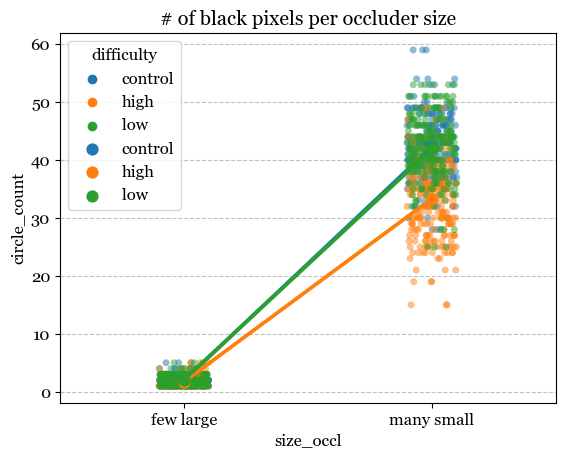

In [22]:
fig, axes = plt.subplots()

stripplot = sns.stripplot(
    data = circle_df_acc,
    y = 'circle_count',
    x = 'size_occl',  
    #palette = {'many small': 'dodgerBlue', 'few large' : 'orange'},
    ax = axes,
    hue = 'difficulty',
    zorder = 2,
    alpha = 0.5
)
pointplot = sns.pointplot(
    data = circle_df_acc,
    y = 'circle_count',
    x = 'size_occl',  
    ax = axes,
    join = True,
    hue =  'difficulty',
    #palette = {'manysmall': 'dodgerBlue', 'fewlarge' : 'orange', 'control' : 'purple'},
    #color = 'black',
    #zorder = 4,
)
plt.title('# of black pixels per occluder size')

plt.show()
#plt.close()

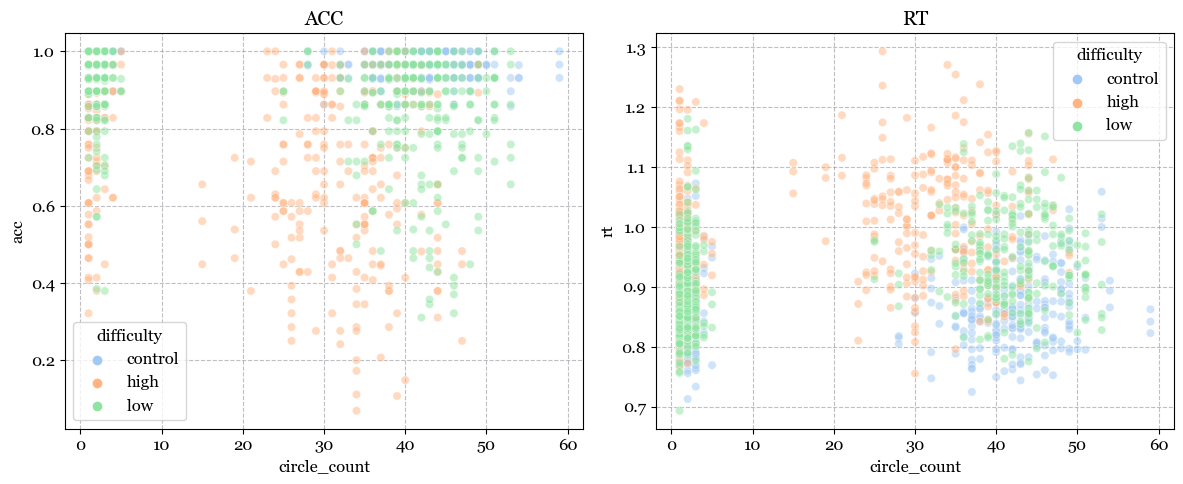

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have two separate figures for each scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First scatter plot
sns.scatterplot(
    data=circle_df_acc,
    y='acc',
    x='circle_count',
    hue="difficulty",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax1
)
ax1.set_title('ACC')

# Second scatter plot
sns.scatterplot(
    data=circle_df_rt,
    y='rt',
    x='circle_count',
    hue="difficulty",
    palette="pastel",
    zorder=2,
    alpha=0.5,
    ax=ax2
)
ax2.set_title('RT')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


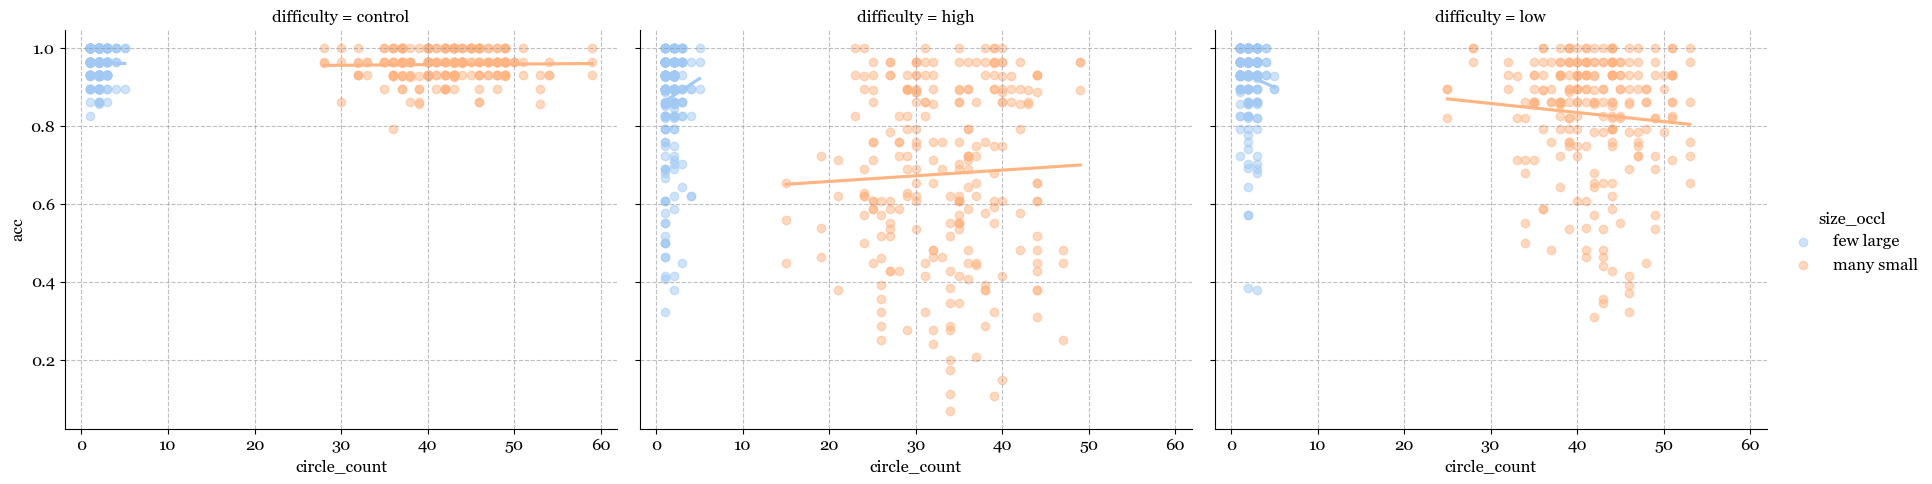

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(
    data=circle_df_acc,
    x='circle_count',
    y='acc',
    hue='size_occl',
    col='difficulty',
    palette='pastel',
    scatter_kws={"alpha": 0.5},
    ci=None,  # Set to None to disable confidence intervals
    height=5,  # Adjust the height of each subplot
    aspect=1.2,  # Adjust the width of each subplot
)
plt.show()


In [25]:
circle_df_acc_ms = circle_df_acc[circle_df_acc['size_occl'] == "many small"]

In [26]:
(pg.linear_regression(circle_df_acc['circle_count'], circle_df_acc['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.911674,0.006233,146.257839,0.000000e+00,0.049383,0.048722,0.899446,0.923901
1,circle_count,-0.001910,0.000221,-8.643040,1.433845e-17,0.049383,0.048722,-0.002344,-0.001477


In [27]:
(pg.linear_regression(circle_df_acc_ms['circle_count'], circle_df_acc_ms['acc']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.498640,0.038776,12.859650,3.298758e-34,0.091245,0.08998,0.422513,0.574766
1,circle_count,0.008266,0.000974,8.490713,1.175337e-16,0.091245,0.08998,0.006355,0.010177


# Remaining Work

### Pixel Count

1. Regression analyses, dv = Accuracy and RT, predictor =  Black pixels, Size of occlusion, and difficulty.
2. Masking effect per image, conduct similar analysis on masking effect as well.
3. Change the seaborn plot on cell-9, apply a cut-off value for few large to be compatible with many small then compare them. 

### Aperture Count

1. Regression analyses, dv = Accuracy and RT, predictor =  Aperture count and difficulty.
2. Masking effect per image, conduct similar analysis on masking effect as well.

**So my main issue right now, is implementing the analysis above. Especially masking effect, I don't understand how this comes into play in terms of explaining what? I get the gist in terms of we substract the accuracy of SOA100 from SOA25 so get the sole effect of masking. How this comes to play in the current analysis?**

Other than these things above, more or less analysis is wrapped up (only one or two things that needs to be removed at the very end)